# Clinical Features Exploration
#### Authors: Shanduojiao Jiang (sj99@stanford.edu), kelly Brennan (kbrenn@stanford.edu)

In [1]:
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score

## Section 1: Data Manipulation

In [2]:
# Read in Clinical Features file
df = pd.read_excel("../data/Clinical_and_Other_Features.xlsx", sheet_name="Data", header=1, skiprows=[2])
df[:5]

,Patient ID,Days to MRI (From the Date of Diagnosis),Manufacturer,Manufacturer Model Name,Scan Options,Field Strength (Tesla),Patient Position During MRI,Image Position of Patient,Contrast Agent,Contrast Bolus Volume (mL),...,Therapeutic or Prophylactic Oophorectomy as part of Endocrine Therapy,Neoadjuvant Anti-Her2 Neu Therapy,Adjuvant Anti-Her2 Neu Therapy,Received Neoadjuvant Therapy or Not,Pathologic response to Neoadjuvant therapy: Pathologic stage (T) following neoadjuvant therapy,Pathologic response to Neoadjuvant therapy: Pathologic stage (N) following neoadjuvant therapy,Pathologic response to Neoadjuvant therapy: Pathologic stage (M) following neoadjuvant therapy,Overall Near-complete Response: Stricter Definition,Overall Near-complete Response: Looser Definition,Near-complete Response (Graded Measure)
0,Breast_MRI_001,6,2,0,5,1,0,-191.8003 X -176.1259 X 86.6065,1.0,15.0,...,1,1.0,1.0,1.0,1.0,-1.0,-1.0,0.0,0.0,0.0
1,Breast_MRI_002,12,0,4,1,3,0,154.724 X 176.048 X 94.5771,1.0,NaN,...,0,0.0,0.0,1.0,NaN,NaN,NaN,2.0,2.0,4.0
2,Breast_MRI_003,10,0,3,2,3,0,174.658 X 228.317 X 88.4878,1.0,NaN,...,0,0.0,0.0,1.0,1.0,1.0,-1.0,0.0,0.0,0.0
3,Breast_MRI_004,18,0,4,1,1,0,188.148 X 194.282 X 94.1832,1.0,NaN,...,0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Breast_MRI_005,12,2,0,5,1,1,-173.063 X -150.7869 X 59.161,1.0,5.0,...,0,1.0,1.0,1.0,0.0,0.0,-1.0,1.0,1.0,1.0


In [22]:
# Read in Image Features file
imageFeat = pd.read_excel("../data/Imaging_Features.xlsx")
imageFeat[:5]

,Patient ID,"F1_DT_POSTCON (T11=0.05,T12=0.5)","F1_DT_POSTCON (T11=0.05,T12=0.1)","F1_DT_POSTCON (T11=0.02,T12=0.5)","F1_DT_POSTCON (T11=0.02,T12=0.8)","F1_DT_POSTCON (T11=0.05,T12=0.8)","F1_DT_POSTCON (T11=0.1,T12=0.5)","F1_DT_POSTCON (T11=0.1,T12=0.8)","F1_DT_POSTCON (T11=0.2,T12=0.5)","F1_DT_POSTCON (T11=0.2,T12=0.8)",...,WashinRate_map_difference_entropy_tissue_PostCon,WashinRate_map_information_measure_correlation1_tissue_PostCon,WashinRate_map_information_measure_correlation2_tissue_PostCon,WashinRate_map_inverse_difference_is_homom_tissue_PostCon,WashinRate_map_inverse_difference_normalized_tissue_PostCon,WashinRate_map_inverse_difference_moment_normalized_tissue_PostCon,WashinRate_map_mean_tissue_PostCon,WashinRate_map_std_dev_tissue_PostCon,WashinRate_map_skewness_tissue_PostCon,WashinRate_map_kurtosis_tissue_PostCon
0,Breast_MRI_001,1.000000,0.120721,0.530395,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,3.380663,-0.025575,0.422391,0.171959,0.960359,0.996829,14.517894,20.347506,1.625870,11.406955
1,Breast_MRI_002,1.000000,0.129546,0.485217,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,3.444474,-0.036063,0.505652,0.177087,0.959067,0.996363,47.297950,83.909561,0.251498,5.659428
2,Breast_MRI_003,0.174775,0.062051,0.069910,0.132265,0.330662,0.349550,0.661324,0.699100,1.00000,...,3.478455,-0.043730,0.546674,0.170507,0.957527,0.995981,114.171582,129.252343,1.928743,11.554948
3,Breast_MRI_004,0.086546,0.045111,0.034619,0.051265,0.128162,0.173093,0.256325,0.346185,0.51265,...,3.389678,-0.017802,0.363818,0.177210,0.960705,0.996827,33.499175,69.164227,1.171314,8.493319
4,Breast_MRI_005,0.289669,0.052031,0.115868,0.378575,0.839984,0.579338,1.000000,0.958287,1.00000,...,4.009938,-0.049294,0.603426,0.117966,0.930624,0.989135,34.406635,26.951415,0.985464,4.331451


In [3]:
# List of clinical features
df.columns

Index(['Patient ID', 'Days to MRI (From the Date of Diagnosis)',
       'Manufacturer', 'Manufacturer Model Name', 'Scan Options',
       'Field Strength (Tesla)', 'Patient Position During MRI',
       'Image Position of Patient', 'Contrast Agent',
       'Contrast Bolus Volume (mL)', 'TR (Repetition Time)', 'TE (Echo Time)',
       'Acquisition Matrix', 'Slice Thickness ', 'Rows', 'Columns',
       'Reconstruction Diameter ', 'Flip Angle \n',
       'FOV Computed (Field of View) in cm ', 'Date of Birth (Days)',
       'Menopause (at diagnosis)', 'Race and Ethnicity',
       'Metastatic at Presentation (Outside of Lymph Nodes)', 'ER', 'PR',
       'HER2', 'Mol Subtype', 'Oncotype score', 'Staging(Tumor Size)# [T]',
       'Staging(Nodes)#(Nx replaced by -1)[N]',
       'Staging(Metastasis)#(Mx -replaced by -1)[M]', 'Tumor Grade',
       'Unnamed: 32', 'Unnamed: 33', 'Nottingham grade', 'Histologic type',
       'Tumor Location', 'Position', 'Bilateral Information', 'Unnamed: 39',
     

#### Generating binary labels for recurrence, readmission, and death

In [4]:
local_recur = df["Days to local recurrence (from the date of diagnosis) "].tolist()
local_recur_label = [0 if r == "NP" else 1 for r in local_recur]

In [5]:
dist_recur = df['Days to distant recurrence(from the date of diagnosis) '].to_list()
dist_recur_label = [0 if r == "NP" else 1 for r in dist_recur]

In [16]:
# Combining local and distance recurrence
recur_label = list(np.array(local_recur_label) + np.array(dist_recur_label))
recur_label = [0 if x == 0 else 1 for x in recur_label]

In [6]:
death = df['Days to death (from the date of diagnosis) '].to_list()
death_label = [0 if r == "NP" else 1 for r in death]

In [21]:
df["local_recur_label"] = local_recur_label
df["dist_recur_label"] = dist_recur_label
df["death_label"] = death_label
df["recur_label"] = recur_label

In [24]:
df_merged = pd.merge(df, imageFeat, on='Patient ID')
df_merged[:5]

,Patient ID,Days to MRI (From the Date of Diagnosis),Manufacturer,Manufacturer Model Name,Scan Options,Field Strength (Tesla),Patient Position During MRI,Image Position of Patient,Contrast Agent,Contrast Bolus Volume (mL),...,WashinRate_map_difference_entropy_tissue_PostCon,WashinRate_map_information_measure_correlation1_tissue_PostCon,WashinRate_map_information_measure_correlation2_tissue_PostCon,WashinRate_map_inverse_difference_is_homom_tissue_PostCon,WashinRate_map_inverse_difference_normalized_tissue_PostCon,WashinRate_map_inverse_difference_moment_normalized_tissue_PostCon,WashinRate_map_mean_tissue_PostCon,WashinRate_map_std_dev_tissue_PostCon,WashinRate_map_skewness_tissue_PostCon,WashinRate_map_kurtosis_tissue_PostCon
0,Breast_MRI_001,6,2,0,5,1,0,-191.8003 X -176.1259 X 86.6065,1.0,15.0,...,3.380663,-0.025575,0.422391,0.171959,0.960359,0.996829,14.517894,20.347506,1.625870,11.406955
1,Breast_MRI_002,12,0,4,1,3,0,154.724 X 176.048 X 94.5771,1.0,NaN,...,3.444474,-0.036063,0.505652,0.177087,0.959067,0.996363,47.297950,83.909561,0.251498,5.659428
2,Breast_MRI_003,10,0,3,2,3,0,174.658 X 228.317 X 88.4878,1.0,NaN,...,3.478455,-0.043730,0.546674,0.170507,0.957527,0.995981,114.171582,129.252343,1.928743,11.554948
3,Breast_MRI_004,18,0,4,1,1,0,188.148 X 194.282 X 94.1832,1.0,NaN,...,3.389678,-0.017802,0.363818,0.177210,0.960705,0.996827,33.499175,69.164227,1.171314,8.493319
4,Breast_MRI_005,12,2,0,5,1,1,-173.063 X -150.7869 X 59.161,1.0,5.0,...,4.009938,-0.049294,0.603426,0.117966,0.930624,0.989135,34.406635,26.951415,0.985464,4.331451


## Section 2: Correlation Analysis

In [ ]:
# Get the binary labels for whether the patient is pre (0) or post (1) menopause
meno_labels = np.array(df["Menopause (at diagnosis)"].to_list())
drop_index = np.where(meno_labels == 2)
dropped_meno_labels = np.delete(meno_labels, drop_index)

local_recur_labels = np.array(df["local_recur_label"].to_list())
dropped_local_recur_labels = np.delete(local_recur_labels, drop_index)

dist_recur_labels = np.array(df["dist_recur_label"].to_list())
dropped_dist_recur_labels = np.delete(dist_recur_labels, drop_index)

death_labels = np.array(df["death_label"].to_list())
dropped_death_labels = np.delete(death_labels, drop_index)

In [ ]:
print("Correlation between pre/post menopause and local recurrence:", np.corrcoef(dropped_meno_labels, dropped_local_recur_labels)[0,1])

In [ ]:
print("Correlation between pre/post menopause and distance recurrence:", np.corrcoef(dropped_meno_labels, dropped_dist_recur_labels)[0,1])

In [ ]:
print("Correlation between pre/post menopause and death:", np.corrcoef(dropped_meno_labels, dropped_death_labels)[0,1])

## Section 3: Deep Learning Model

### 3.1. Logistic Regression Model

#### Local Recurrence Prediction

In [26]:
df_merged.columns.tolist()

['Patient ID',
 'Days to MRI (From the Date of Diagnosis)',
 'Manufacturer',
 'Manufacturer Model Name',
 'Scan Options',
 'Field Strength (Tesla)',
 'Patient Position During MRI',
 'Image Position of Patient',
 'Contrast Agent',
 'Contrast Bolus Volume (mL)',
 'TR (Repetition Time)',
 'TE (Echo Time)',
 'Acquisition Matrix',
 'Slice Thickness ',
 'Rows',
 'Columns',
 'Reconstruction Diameter ',
 'Flip Angle \n',
 'FOV Computed (Field of View) in cm ',
 'Date of Birth (Days)',
 'Menopause (at diagnosis)',
 'Race and Ethnicity',
 'Metastatic at Presentation (Outside of Lymph Nodes)',
 'ER',
 'PR',
 'HER2',
 'Mol Subtype',
 'Oncotype score',
 'Staging(Tumor Size)# [T]',
 'Staging(Nodes)#(Nx replaced by -1)[N]',
 'Staging(Metastasis)#(Mx -replaced by -1)[M]',
 'Tumor Grade',
 'Unnamed: 32',
 'Unnamed: 33',
 'Nottingham grade',
 'Histologic type',
 'Tumor Location',
 'Position',
 'Bilateral Information',
 'Unnamed: 39',
 'Unnamed: 40',
 'For Other Side If Bilateral',
 'Unnamed: 42',
 'Unna

In [32]:
interested_features = ['ER', 'PR',
                       'HER2', 'Mol Subtype', 'Staging(Tumor Size)# [T]',
                       'Staging(Nodes)#(Nx replaced by -1)[N]',
                       'Staging(Metastasis)#(Mx -replaced by -1)[M]', 'Tumor Grade',
                       'Unnamed: 32', 'Unnamed: 33', 'Nottingham grade', 'Histologic type']
X = df[interested_features].dropna().to_numpy()
y = df[interested_features + ["local_recur_label"]].dropna()["local_recur_label"].to_numpy()

In [33]:
X_train_local, X_test_local, y_train_local, y_test_local = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_local, X_val_local, y_train_local, y_val_local = train_test_split(X_train_local, y_train_local, test_size=0.2, random_state=1)

In [34]:
logreg_local = LogisticRegression(random_state=16)
logreg_local.fit(X_train_local, y_train_local)
y_pred_local = logreg_local.predict(X_test_local)

In [35]:
print("Local recurrence prediction")
print("Accuracy:", accuracy_score(y_test_local, y_pred_local), 
      "\nRecall:", recall_score(y_test_local, y_pred_local),
      "\nPrecision:", precision_score(y_test_local, y_pred_local, zero_division=0))

Local recurrence prediction
Accuracy: 0.959349593495935 
Recall: 0.0 
Precision: 0.0


#### Distance Recurrence Prediction

In [ ]:
interested_features = ['ER', 'PR',
                       'HER2', 'Mol Subtype', 'Staging(Tumor Size)# [T]',
                       'Staging(Nodes)#(Nx replaced by -1)[N]',
                       'Staging(Metastasis)#(Mx -replaced by -1)[M]', 'Tumor Grade',
                       'Unnamed: 32', 'Unnamed: 33', 'Nottingham grade', 'Histologic type']
X = df[interested_features].dropna().to_numpy()
y = df[interested_features + ["dist_recur_label"]].dropna()["dist_recur_label"].to_numpy()

In [ ]:
X_train_dist, X_test_dist, y_train_dist, y_test_dist = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_dist, X_val_dist, y_train_dist, y_val_dist = train_test_split(X_train_dist, y_train_dist, test_size=0.2, random_state=1)

In [ ]:
logreg_dist = LogisticRegression(random_state=16)
logreg_dist.fit(X_train_dist, y_train_dist)
y_pred_dist = logreg_dist.predict(X_test_dist)

In [ ]:
print("Distance recurrence prediction")
print("Accuracy:", accuracy_score(y_test_dist, y_pred_dist), 
      "\nRecall:", recall_score(y_test_dist, y_pred_dist),
      "\nPrecision:", precision_score(y_test_dist, y_pred_dist, zero_division=0))

#### Death Prediction

In [ ]:
interested_features = ['ER', 'PR',
                       'HER2', 'Mol Subtype', 'Staging(Tumor Size)# [T]',
                       'Staging(Nodes)#(Nx replaced by -1)[N]',
                       'Staging(Metastasis)#(Mx -replaced by -1)[M]', 'Tumor Grade',
                       'Unnamed: 32', 'Unnamed: 33', 'Nottingham grade', 'Histologic type']
X = df[interested_features].dropna().to_numpy()
y = df[interested_features + ["death_label"]].dropna()["death_label"].to_numpy()

In [ ]:
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_death, X_val_death, y_train_death, y_val_death = train_test_split(X_train_death, y_train_death, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [ ]:
logreg_death = LogisticRegression(random_state=16)
logreg_death.fit(X_train_death, y_train_death)
y_pred_death = logreg_death.predict(X_test_death)

In [ ]:
print("Death prediction")
print("Accuracy:", accuracy_score(y_test_death, y_pred_death), 
      "\nRecall:", recall_score(y_test_death, y_pred_death),
      "\nPrecision:", precision_score(y_test_death, y_pred_death, zero_division=0))

### 3.2. Neural Network

#### Local Recurrence Prediction

In [ ]:
model_local = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation="softmax"),
])

model_local.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy", "AUC", tf.keras.metrics.Recall(), tf.keras.metrics.Precision()]
)

In [ ]:
EPOCH=200
hist = model_local.fit(X_train_local, y_train_local, epochs=EPOCH, validation_data=(X_val_local, y_val_local))

In [ ]:
model_local.evaluate(X_test_local, y_test_local)

In [ ]:
plt.figure()
plt.plot(range(EPOCH), hist.history['loss'], label='Training loss')
plt.plot(range(EPOCH), hist.history['val_loss'], label='Validation loss')
plt.title("Training and Validation Loss for Local Recurrence Prediction")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

#### Distance Recurrence Prediction

In [ ]:
model_dist = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation="softmax"),
])

model_dist.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy", "AUC", tf.keras.metrics.Recall(), tf.keras.metrics.Precision()]
)

In [ ]:
hist = model_dist.fit(X_train_dist, y_train_dist, epochs=EPOCH, validation_data=(X_val_dist, y_val_dist))

In [ ]:
model_dist.evaluate(X_test_dist, y_test_dist)

In [ ]:
plt.figure()
plt.plot(range(EPOCH), hist.history['loss'], label='Training loss')
plt.plot(range(EPOCH), hist.history['val_loss'], label='Validation loss')
plt.title("Training and Validation Loss for Distance Recurrence Prediction")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

#### Death Prediction

In [ ]:
model_death = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation="softmax"),
])

model_death.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy", "AUC", tf.keras.metrics.Recall(), tf.keras.metrics.Precision()]
)

In [ ]:
hist = model_death.fit(X_train_death, y_train_death, epochs=EPOCH, validation_data=(X_val_death, y_val_death))

In [ ]:
model_death.evaluate(X_test_death, y_test_death)

In [ ]:
plt.figure()
plt.plot(range(EPOCH), hist.history['loss'], label='Training loss')
plt.plot(range(EPOCH), hist.history['val_loss'], label='Validation loss')
plt.title("Training and Validation Loss for Death Prediction")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

## 12/6 Update: Include Image Feature

In [156]:
# Random sample the negative class to balance the dataset
death_df = pd.concat([df_merged[df_merged["death_label"] == 0].sample(n=2*df.value_counts("death_label")[1], random_state=42), df_merged[df_merged["death_label"] == 1]])
len(death_df)

186

In [166]:
# interested_features = imageFeat.columns.tolist()[1:] + ['ER', 'PR',
#                        'HER2', 'Mol Subtype', 'Staging(Tumor Size)# [T]',
#                        'Staging(Nodes)#(Nx replaced by -1)[N]',
#                        'Staging(Metastasis)#(Mx -replaced by -1)[M]', 'Tumor Grade',
#                        'Unnamed: 32', 'Unnamed: 33', 'Nottingham grade', 'Histologic type']
interested_features = imageFeat.columns.tolist()[1:] + ['Tumor Grade', 'Nottingham grade', 'Histologic type']
X = death_df[interested_features].dropna().to_numpy()
y = death_df[interested_features + ["death_label"]].dropna()["death_label"].to_numpy()

In [167]:
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_death, X_val_death, y_train_death, y_val_death = train_test_split(X_train_death, y_train_death, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [168]:
len(X)

106

### LogReg

In [169]:
logreg_death = LogisticRegression(random_state=16)
logreg_death.fit(X_train_death, y_train_death)
y_pred_death = logreg_death.predict(X_test_death)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [170]:
print("Death prediction")
print("Accuracy:", accuracy_score(y_test_death, y_pred_death), 
      "\nRecall:", recall_score(y_test_death, y_pred_death),
      "\nPrecision:", precision_score(y_test_death, y_pred_death, zero_division=0))

Death prediction
Accuracy: 0.7272727272727273 
Recall: 0.625 
Precision: 0.625


### Deep Learning

In [171]:
model_death = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation="softmax"),
])

model_death.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy", "AUC", tf.keras.metrics.Recall(), tf.keras.metrics.Precision()]
)

In [172]:
EPOCH=100
hist = model_death.fit(X_train_death, y_train_death, epochs=EPOCH, validation_data=(X_val_death, y_val_death))

Epoch 1/100
2/2 [==============================] - 1s 376ms/step - loss: 230709.1250 - accuracy: 0.3016 - auc: 0.5000 - recall_14: 1.0000 - precision_14: 0.3016 - val_loss: 232982.1406 - val_accuracy: 0.2857 - val_auc: 0.5000 - val_recall_14: 1.0000 - val_precision_14: 0.2857
Epoch 2/100
2/2 [==============================] - 0s 28ms/step - loss: 153590.4219 - accuracy: 0.3016 - auc: 0.5000 - recall_14: 1.0000 - precision_14: 0.3016 - val_loss: 181347.5781 - val_accuracy: 0.2857 - val_auc: 0.5000 - val_recall_14: 1.0000 - val_precision_14: 0.2857
Epoch 3/100
2/2 [==============================] - 0s 26ms/step - loss: 108894.6484 - accuracy: 0.3016 - auc: 0.5000 - recall_14: 1.0000 - precision_14: 0.3016 - val_loss: 85360.3750 - val_accuracy: 0.2857 - val_auc: 0.5000 - val_recall_14: 1.0000 - val_precision_14: 0.2857
Epoch 4/100
2/2 [==============================] - 0s 29ms/step - loss: 101009.4609 - accuracy: 0.3016 - auc: 0.5000 - recall_14: 1.0000 - precision_14: 0.3016 - val_loss: 

In [173]:
model_death.evaluate(X_test_death, y_test_death)

1/1 [==============================] - 0s 24ms/step - loss: 8276.3096 - accuracy: 0.3636 - auc: 0.5000 - recall_14: 1.0000 - precision_14: 0.3636


[8276.3095703125, 0.3636363744735718, 0.5, 1.0, 0.3636363744735718]

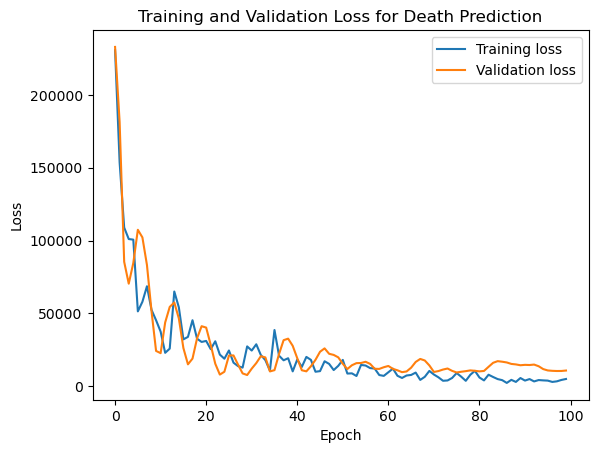

In [174]:
plt.figure()
plt.plot(range(EPOCH), hist.history['loss'], label='Training loss')
plt.plot(range(EPOCH), hist.history['val_loss'], label='Validation loss')
plt.title("Training and Validation Loss for Death Prediction")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()